In [2]:
import pandas as pd 

In [3]:
df=pd.read_csv('mtcars.csv')
df.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df.describe()# describes only numerical data 

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [5]:
df.describe(include='O')

,model
count,32
unique,32
top,Mazda RX4
freq,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [7]:
df.sum().isnull()

model    False
mpg      False
cyl      False
disp     False
hp       False
drat     False
wt       False
qsec     False
vs       False
am       False
gear     False
carb     False
dtype: bool

# **Assumptions of linear regression**
* linearity('tells about corelation between two numerical columns')
* Normality('used to done checks')
* colinearity('tells the relation between target and source column')

In [8]:
#linearity
df.corr(numeric_only=True) # checks corelation with all the columns

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [9]:
df.corr(numeric_only=True).mpg # checks only single column  mpg

mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
Name: mpg, dtype: float64

In [10]:
df1=df.loc[:,['cyl','disp','hp','drat','wt','vs','mpg']] # we removied some columns becasue they are very low corelated to mpg column
df1.head(2)

,cyl,disp,hp,drat,wt,vs,mpg
0,6,160.0,110,3.9,2.620,0,21.0
1,6,160.0,110,3.9,2.875,0,21.0


In [11]:
#  Normality 
# Skewness and kurtosis are measure of normality
import seaborn as sns

<Axes: xlabel='cyl', ylabel='Count'>

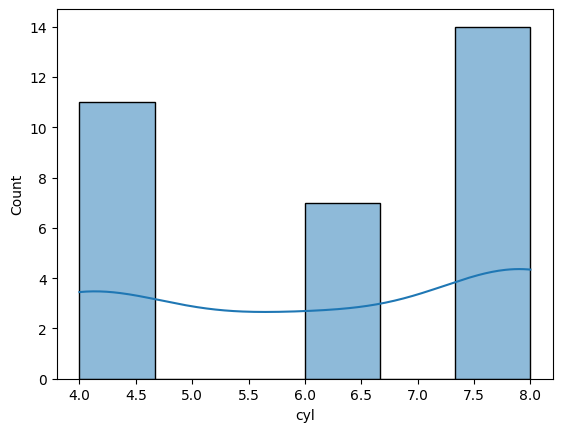

In [12]:
sns.histplot(x=df1.cyl,kde=True)

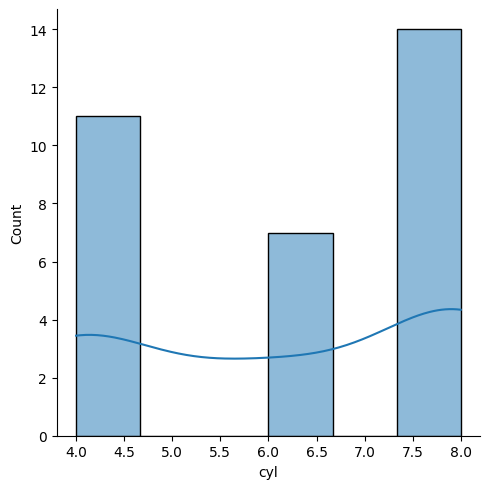

In [14]:
sns.displot(x=df1.cyl,kde=True)

In [15]:
print('skwness of disp',df1.disp.skew())
print('kurtisis of disp',df1.disp.kurtosis())

skwness of disp 0.42023312147004516
kurtisis of disp -1.0675234001434708


In [16]:
print('skwness of cyl',df1.cyl.skew())
print('kurtisis of cyl',df1.cyl.kurtosis())

skwness of cyl -0.19226086006934684
kurtisis of cyl -1.7627938970111958


#### Since kurtosis value is >-1,cyl dose not not following the assumption of normality

In [17]:
print('skwness of hp',df1.hp.skew())
print('kurtisis of hp',df1.hp.kurtosis())

skwness of hp 0.7994066925956381
kurtisis of hp 0.2752115875371124


In [18]:
print('skwness of dart',df1.drat.skew())
print('kurtisis of dart',df1.drat.kurtosis())

skwness of dart 0.29278021324083486
kurtisis of dart -0.45043245112717223


In [19]:
print('skwness of wt',df1.wt.skew())
print('kurtisis of wt',df1.wt.kurtosis())

skwness of wt 0.4659161067929858
kurtisis of wt 0.416594669634927


In [20]:
print('skwness of vs',df1.vs.skew())
print('kurtisis of vs',df1.vs.kurtosis())

skwness of vs 0.2645417988063449
kurtisis of vs -2.0632731253420906


#### the vs is not following the normality assumption 

In [21]:
print('skwness of mpg',df1.mpg.skew())
print('kurtisis of mpg',df1.mpg.kurtosis())

skwness of mpg 0.6723771376290805
kurtisis of mpg -0.0220062914240855


# Insight
* we will drop the columns **cyl** and **VS** becaues they don't follow the assumption normality

In [214]:
df1.drop(columns=['cyl','vs'],inplace=True)

In [22]:
df1.head()

,cyl,disp,hp,drat,wt,vs,mpg
0,6,160.0,110,3.90,2.620,0,21.0
1,6,160.0,110,3.90,2.875,0,21.0
2,4,108.0,93,3.85,2.320,1,22.8
3,6,258.0,110,3.08,3.215,1,21.4
4,8,360.0,175,3.15,3.440,0,18.7


<Axes: >

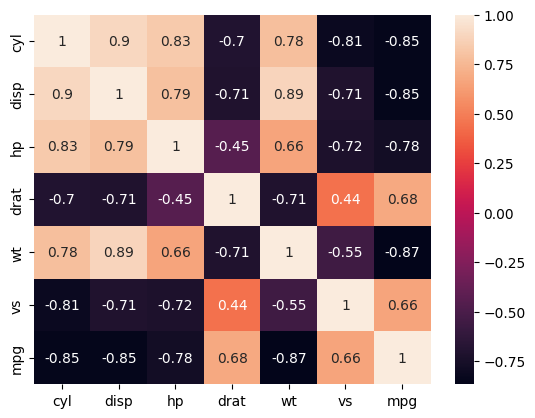

In [23]:
sns.heatmap(df1.corr(numeric_only=True),annot=True)

In [24]:
# colinearity
df1.corr(numeric_only=True)

,cyl,disp,hp,drat,wt,vs,mpg
cyl,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.810812,-0.852162
disp,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.710416,-0.847551
hp,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.723097,-0.776168
drat,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.440278,0.681172
wt,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.554916,-0.867659
vs,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,1.000000,0.664039
mpg,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.664039,1.000000


<Axes: >

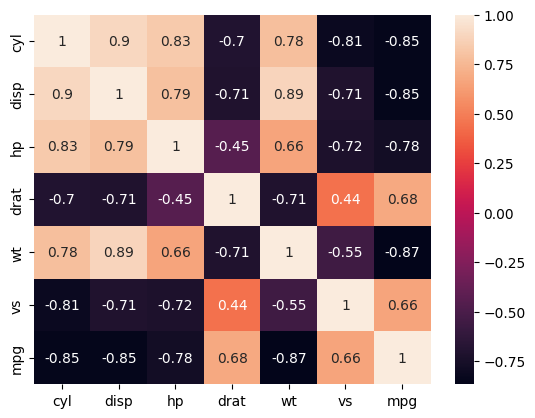

In [25]:
sns.heatmap(df1.corr(numeric_only=True),annot=True)

#### we will drop the column disp beacues it has very poor relation with mpg column

In [269]:
df1.drop(columns='disp',inplace=True)

In [26]:
df1.head()

,cyl,disp,hp,drat,wt,vs,mpg
0,6,160.0,110,3.90,2.620,0,21.0
1,6,160.0,110,3.90,2.875,0,21.0
2,4,108.0,93,3.85,2.320,1,22.8
3,6,258.0,110,3.08,3.215,1,21.4
4,8,360.0,175,3.15,3.440,0,18.7


# Linear regression

In [27]:
X=df1.iloc[:,:-1]
y=df1.mpg

In [257]:
X

,disp,hp,drat,wt
0,160.0,110,3.90,2.620
1,160.0,110,3.90,2.875
2,108.0,93,3.85,2.320
3,258.0,110,3.08,3.215
4,360.0,175,3.15,3.440
5,225.0,105,2.76,3.460
6,360.0,245,3.21,3.570
7,146.7,62,3.69,3.190
8,140.8,95,3.92,3.150
9,167.6,123,3.92,3.440


In [28]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [30]:
X_train.shape

(25, 6)

In [31]:
X_test.shape

(7, 6)

In [32]:
y_train.shape

(25,)

In [33]:
y_test.shape

(7,)

In [34]:
#model creation
from sklearn.linear_model import LinearRegression


In [35]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()